# PRCP-1018-BikeRental
### PTID-CDS-DEC-23-1722

Predict daily bike rental count based on environmental and seasonal settings. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse, max_error

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
rd=pd.read_csv('day.csv')
rd=rd.drop(columns=['instant', 'dteday'])#Dropping indices
rd.head(pd.set_option('display.max_columns',None))
rd.info()
rd.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**01) instant**--
* 'instant' indicates the number in which an entry has been made in the dataset.

**02) dteday**--
* 'dteday' indicates the date in which an entry has been made.

**03) season**--
* It indicates the four seasons in numeric.
 * '1' represents winter
 * '2' represents spring
 * '3' represents summer
 * '4' represents fall

**04) yr**--
* 'yr' indicates the year in which the entries have been made.
 * '0' represents the year 2011
 * '1' represents the year 2012

**05) mnth**--
* 'mnth' indicates the month in which the entries have been made.
* It is in numeric format ranging form 1 to 12 in order of the months, *January* as '1' to *December* as '12'.

**06) holiday**--
* 'holiday' indicates whether the day in which the entry has been made is a holiday or not.
* It is in numeric format-
 * '0' for the days which are not holidays
 * '1' for the day which are holidays

**07) weekday**--
* 'weekday' indicates the 7 days of a week in a numeric format.
 * it ranges from '0' to '6' in order of the weekdays, '0' as *monday* to '6' as *sunday*.

**08) workingday**--
* it generally represents the days in which people go to work.
 * if it is neither weekend nor holiday it is represented as '1'
 * otherwise it is '0'

**09) weathersit**--
* It represents the situation of weather at the time when an entry has been made.
* It is in numeric format-
 * **'1'** for Clear, Few clouds, Partly cloudy, Partly cloudy
 * **'2'** for Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * **'3'** for Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * **'4'** for Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

**10) temp**--
* It indicates the temperature in degree celsius at the time when an entry has been made.
 * the values in the dataset are derived via  (t-t_min)/(t_max-t_min)
 * where, t_min=-8, t_max=+39

**11) atemp**--
* It indicates the normalized feeling temperature in degree celsius at the time when an entry has been made.
 * the values in the dataset are deerived via (t-t_min)/(t_max-t_min)
 * t_min=-16, t_max=+50

**12) hum**--
* It  represents the humidity in the surroundings at the time when an entry has been made.

**13) windspeed**--
* It represents the normalized windspeed in the surroundings at the time when an entry has been made.

**14) casual**--
* It represents the count of casual bike rental users.

**15) registered**--
* It represents the count of registered users.

**16) cnt**--
* It represents the total bike rentals including both the registered and casual users.

In [3]:
rd.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

## Exploratory Data Analysis

Input : temporal and weather data.

Output : Number of registered, casual and total renters. 

We will mainly focus on total renters in this project. 

Our categorical data has been encoded into numerical data, we will temporarily change it back for ease in interpreting graphs.

In [4]:
rd.season=rd.season.map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
rd.yr=rd.yr.map({0:'2011', 1:'2012'})
rd.weathersit=rd.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Precipitation', 4:'Heavy Precipitation'})

#### Yearly Variation

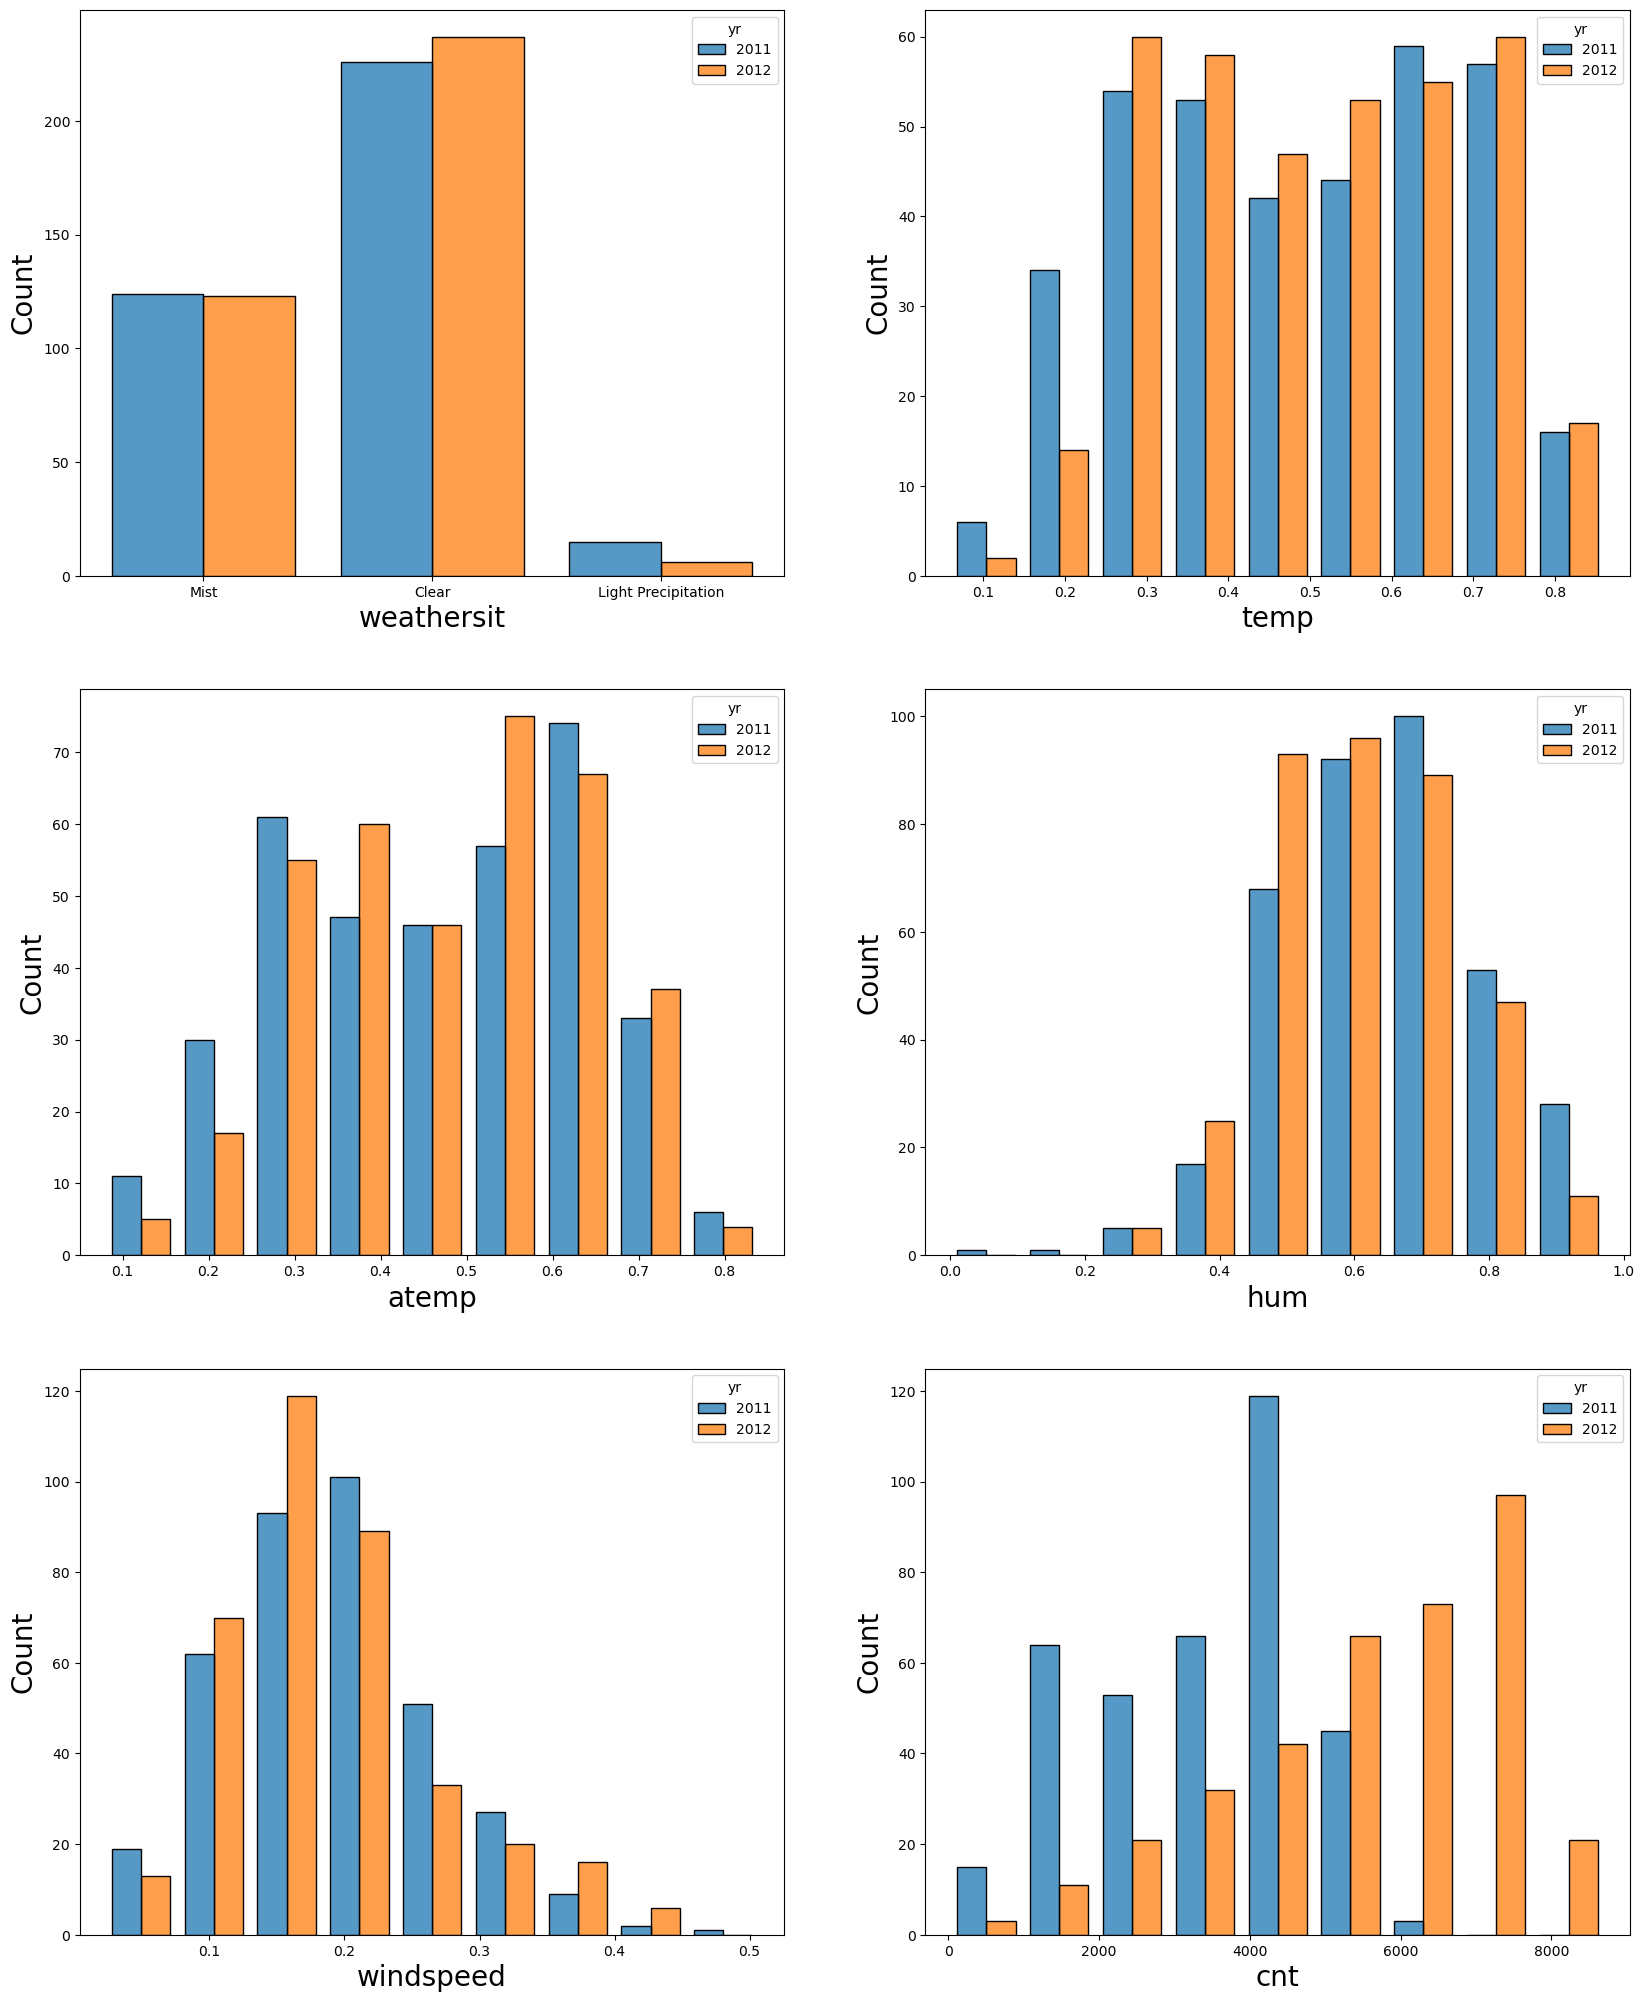

In [5]:
plt.figure(figsize=(20,25))
for num,col in enumerate(['weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']):
    ax=plt.subplot(3,2,num+1)
    sns.histplot(x=rd[col],hue=rd.yr,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Count',fontsize=20)
plt.tight_layout;

#### Seasonal Variation

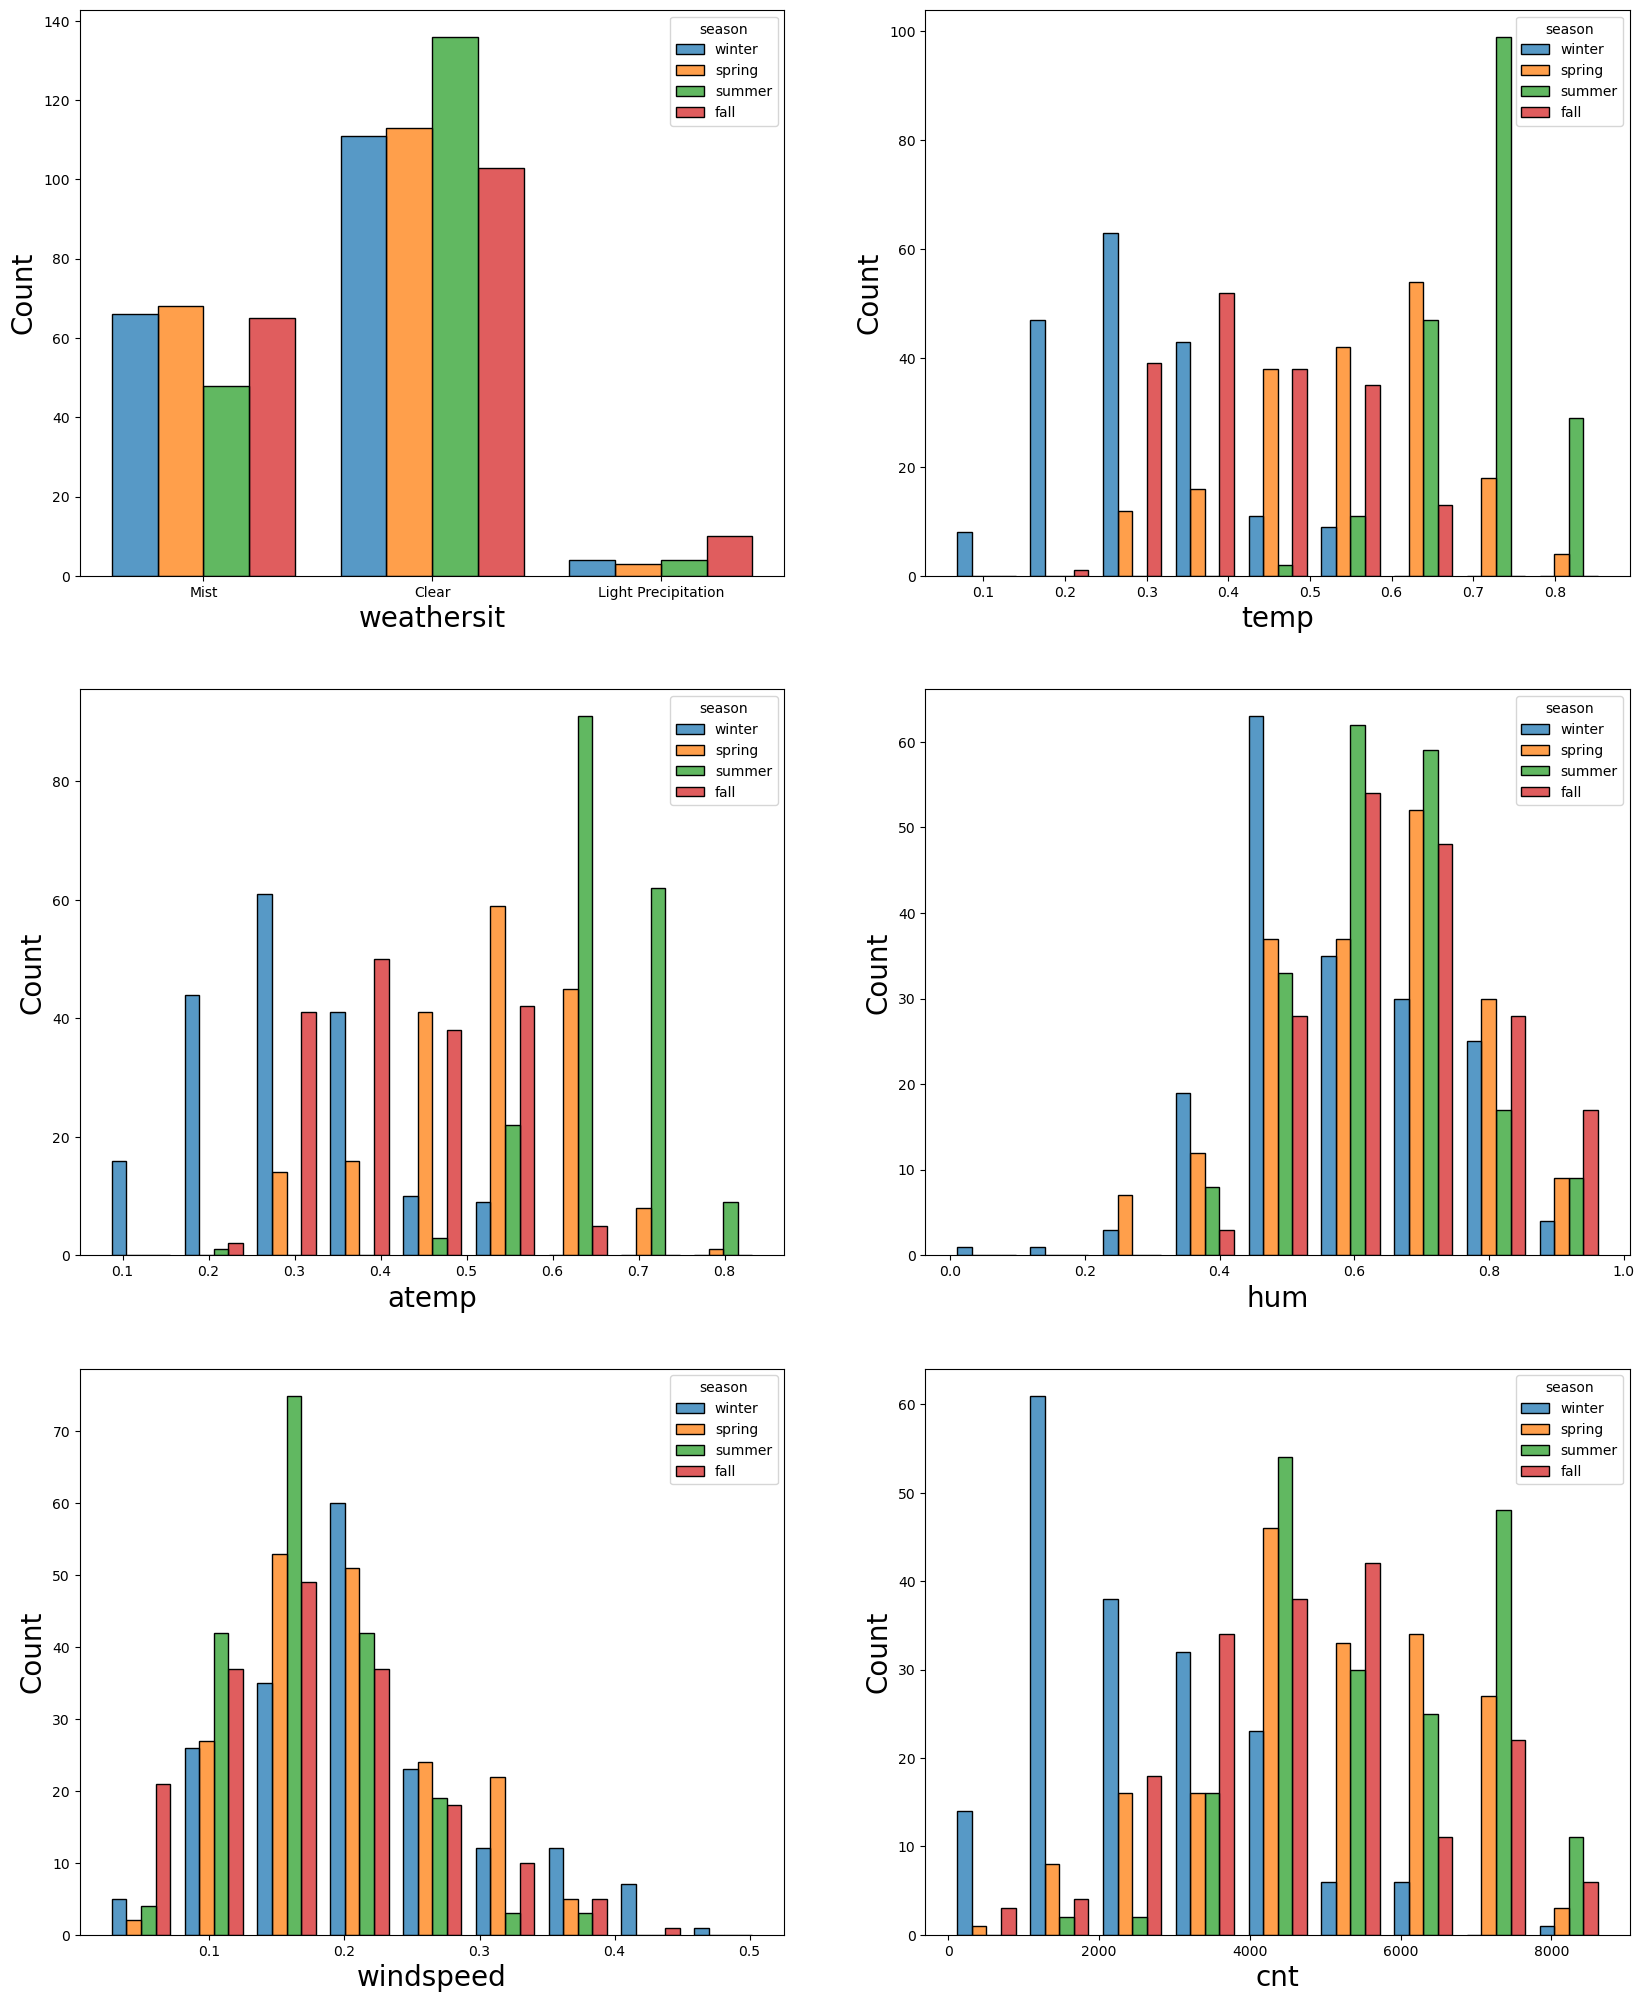

In [6]:
plt.figure(figsize=(20,25))
for num,col in enumerate(['weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']):
    ax=plt.subplot(3,2,num+1)
    sns.histplot(x=rd[col],hue=rd.season,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Count',fontsize=20)
plt.tight_layout;

#### Rentals variation with weather

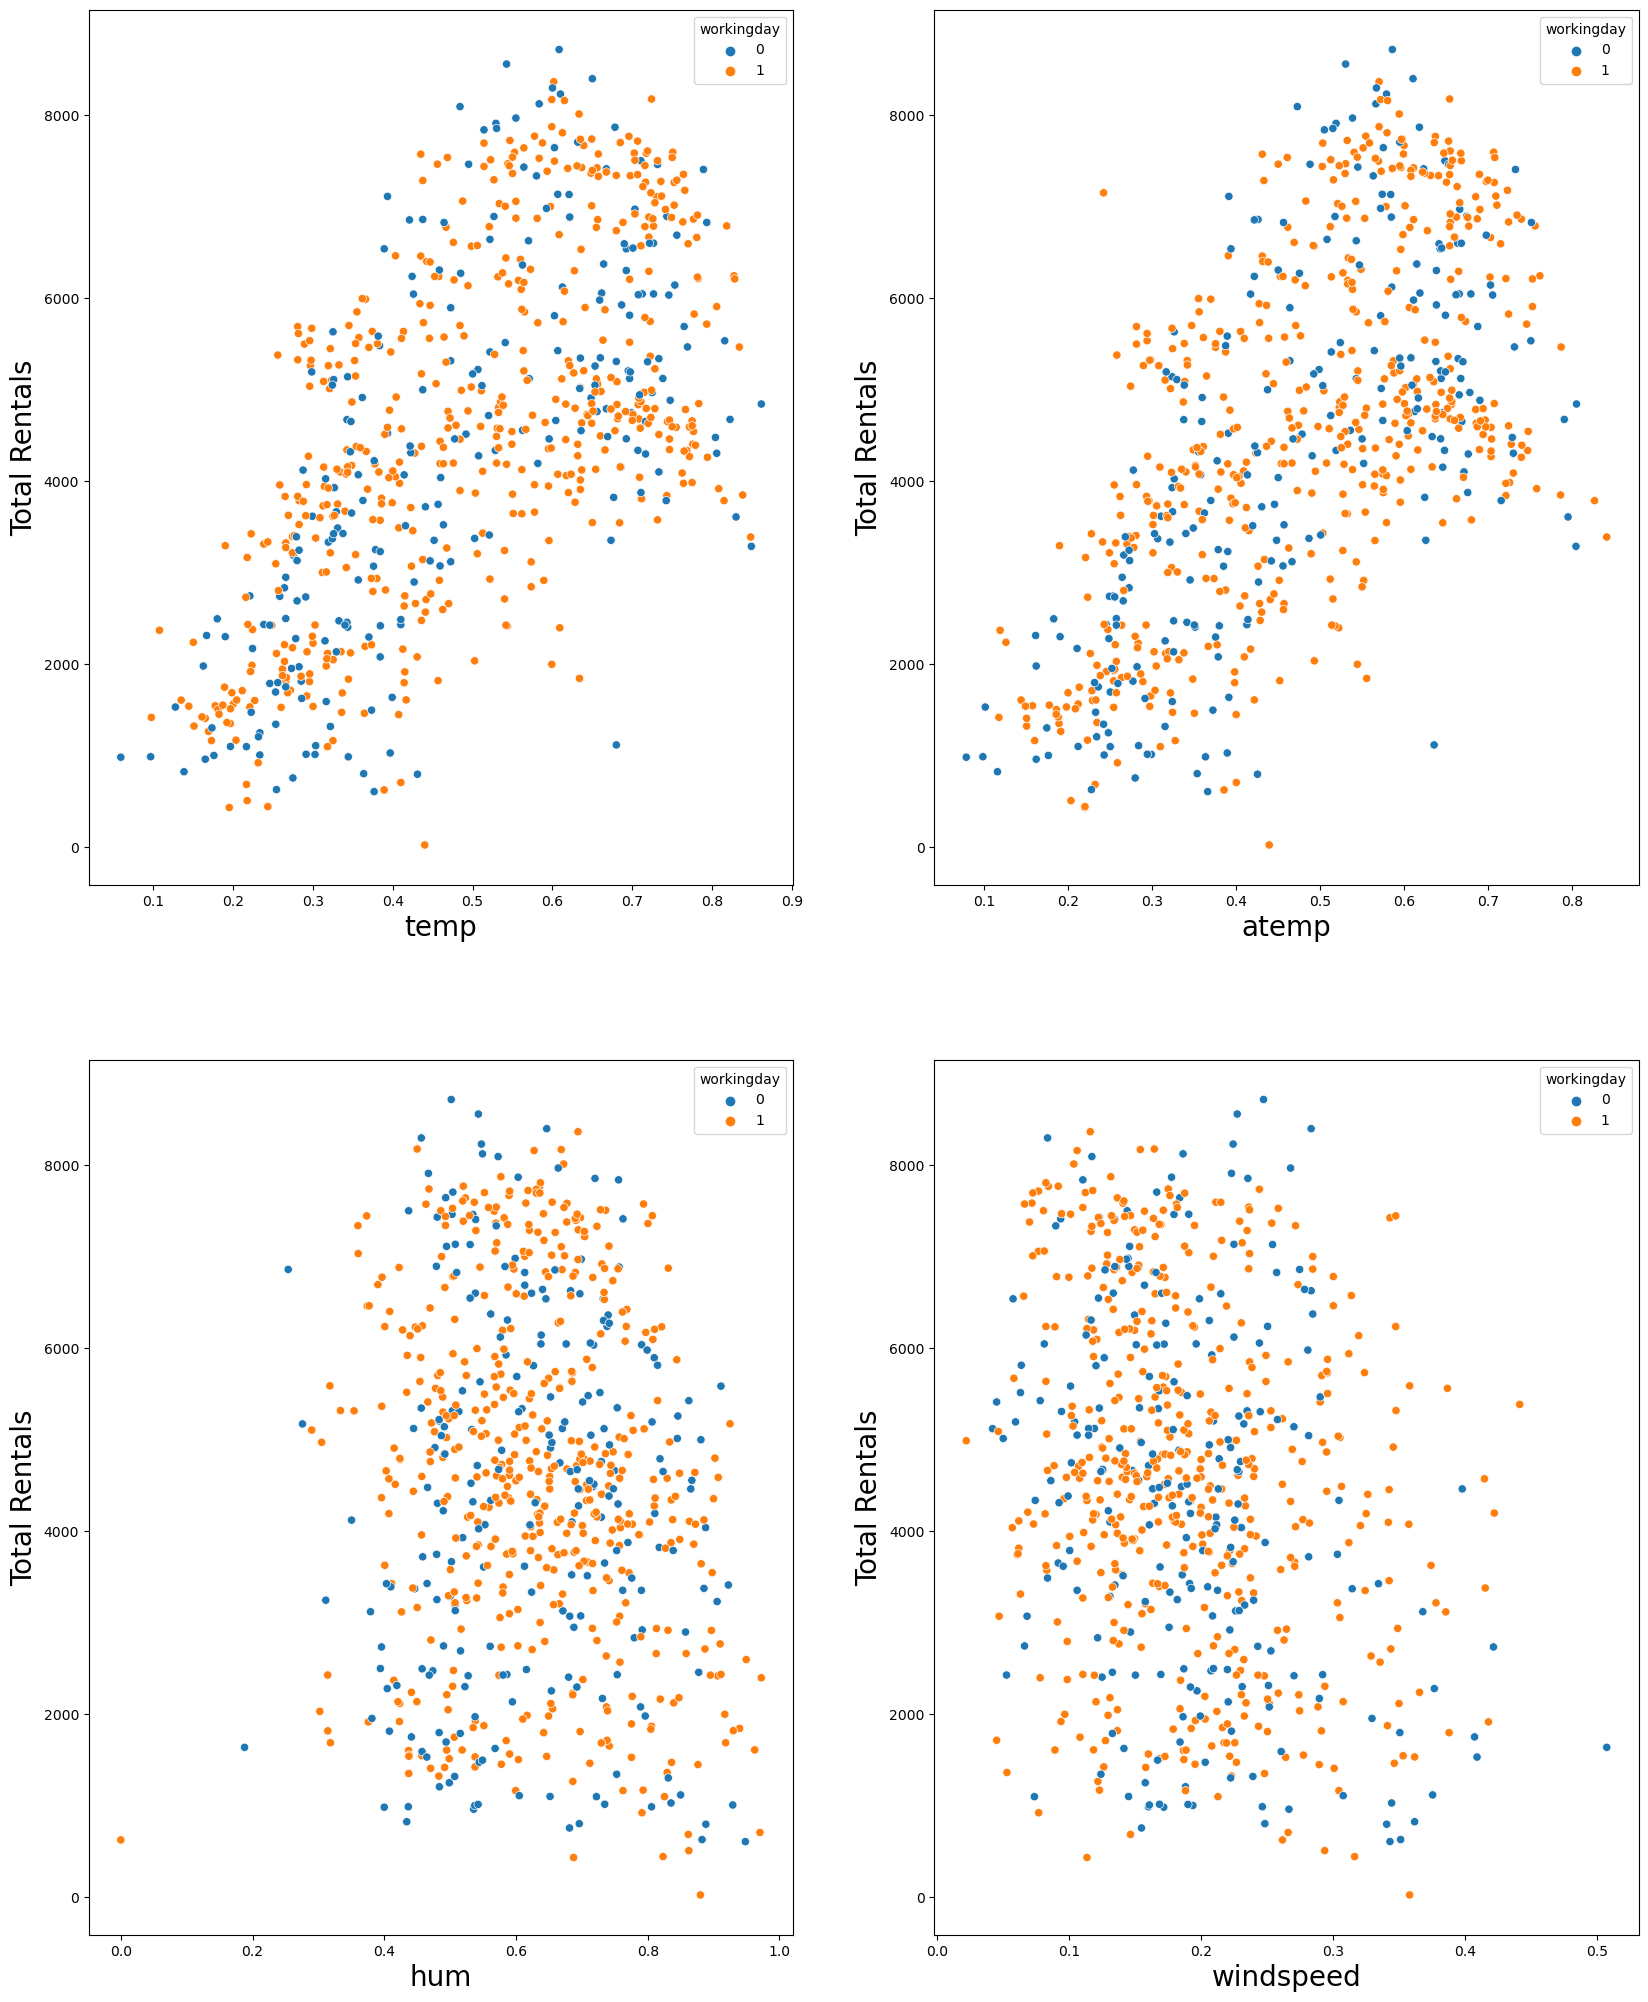

In [7]:
#Variation of rentals with weather with workingday adding in 
plt.figure(figsize=(20,25))
for num,col in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    ax=plt.subplot(2,2,num+1)
    sns.scatterplot(x=rd[col],y=rd.cnt,hue=rd.workingday)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Total Rentals',fontsize=20)
plt.tight_layout;

### Insights

 - Rentals are highest on clear days and steeply drop if there is any precipitation.
 - Rentals are lowest in winter and highest in summer.
 - Rentals have increased in the second year. 
 - When weather is mild, there are more rentals on non working days. 
 - During extremes of weather, there are more rentals on working days. 

## Data Preprocessing


In [8]:
#We will reload data to bring back encoding.
rd=pd.read_csv('day.csv')
rd=rd.drop(columns=['instant', 'dteday'])#Dropping indices

### Removing Null values

From describe, we know that there is no null value. 


### Outliers

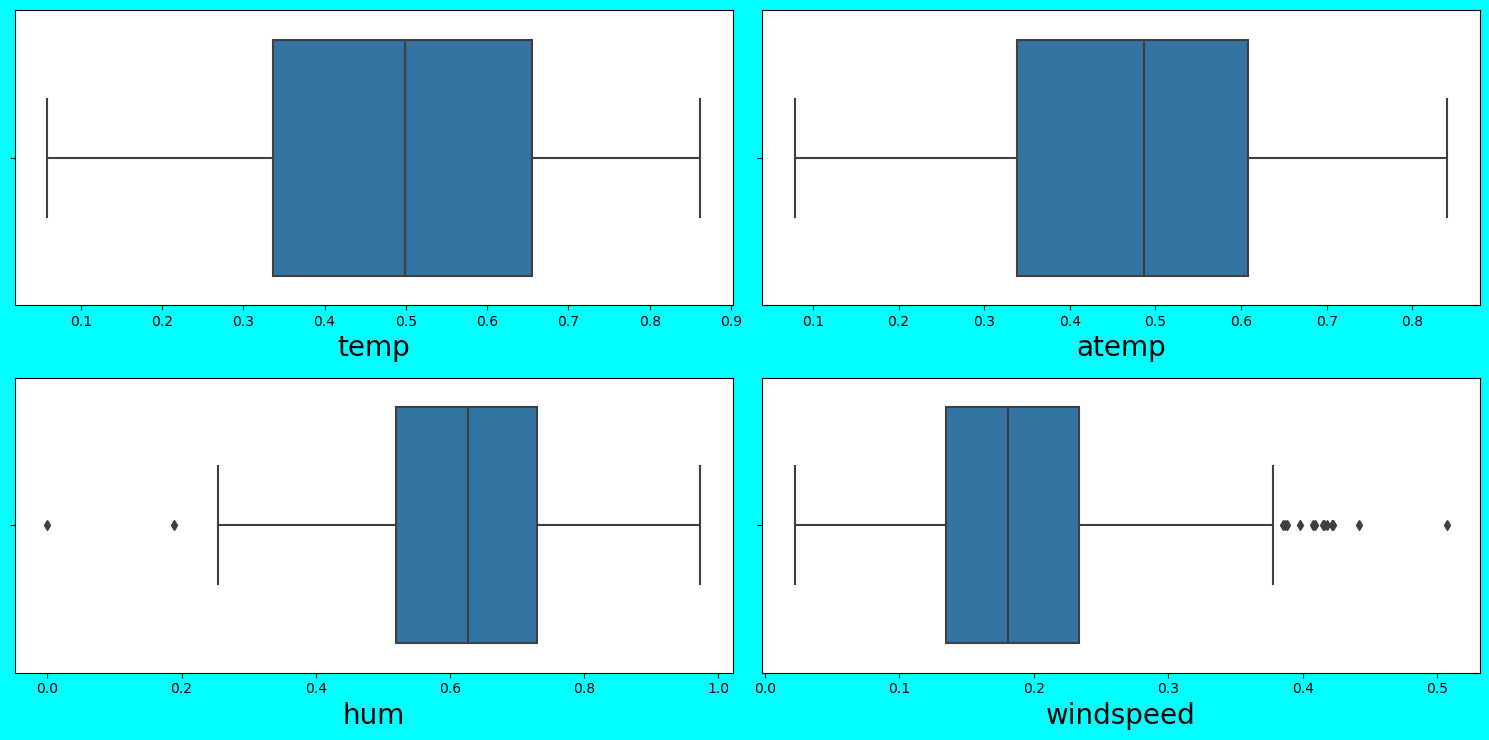

In [9]:
#We need to check for outliers only for numerical values, not for encoded categorical values
# We also don't check it for the 'output'
out=['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(15,7.5),facecolor='aqua')
plotnumber=1

for column in out:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=rd[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout();

#### Imputing Outliers

In [10]:
#Impute outliers via IQR method

lower_limit=[]
upper_limit=[]

for column in out:
    q1=rd[column].quantile(0.25)
    q3=rd[column].quantile(0.75)
    iqr=q3-q1
    lower_limit.append(q1-1.5*iqr)
    upper_limit.append(q3+1.5*iqr)
#lower_limit
#upper_limit
for num,column in list(enumerate(out)):
    rd.loc[rd[column]<lower_limit[num],column]=rd[column].median()
for num,column in list(enumerate(out)):
    rd.loc[rd[column]>upper_limit[num],column]=rd[column].median()

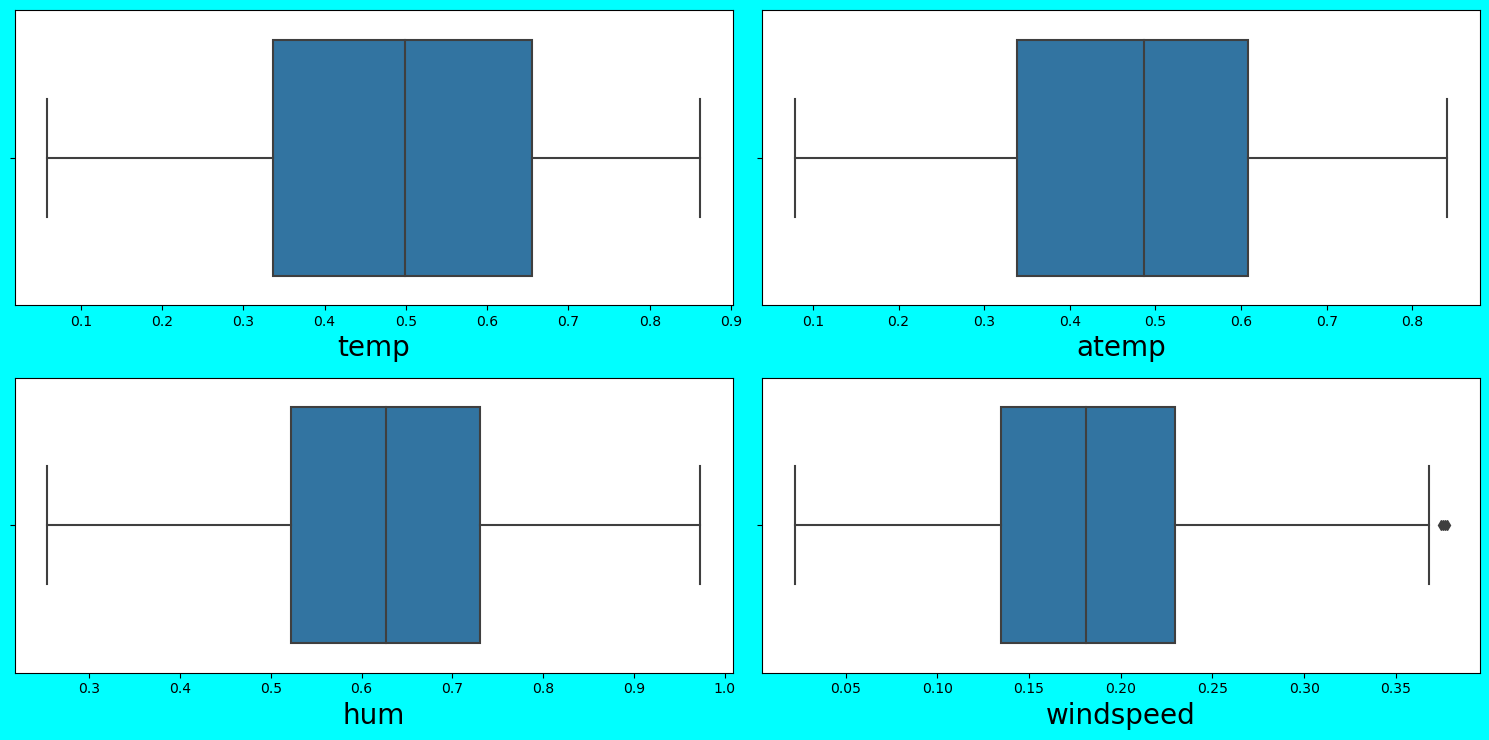

In [11]:
plt.figure(figsize=(15,7.5),facecolor='aqua')
plotnumber=1

for column in out:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=rd[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout();

### Encoding
Categorical data is already encoded.

### Scaling
Numerical data is already scaled. 

## Feature Selection

<Axes: >

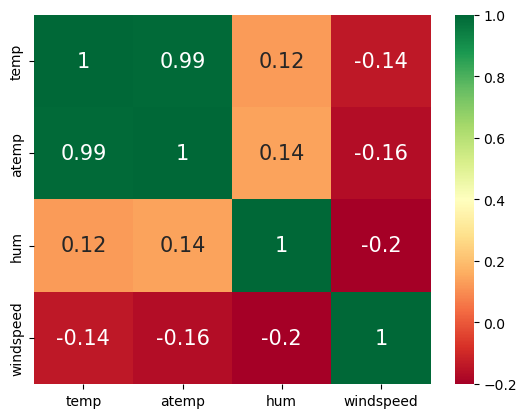

In [12]:
#Checking correlation
#We are only looking at numerical data not encoded categorical data
nd=rd.drop(columns=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 
       'casual', 'registered', 'cnt'])
sns.heatmap(nd.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

As expected, recorded temperature and temperature feel are highly correlated. We will remove  temperature feel (atemp) attribute. 
In the categorical attribute holiday and workingday are similar and we will retain workingday. 

## Model Building

In [13]:
x=rd.drop(columns=['holiday','atemp','casual', 'registered','cnt'])
y=rd.cnt
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,1,1,1,0.196364,0.437273,0.248309
3,1,0,1,2,1,1,0.200000,0.590435,0.160296
4,1,0,1,3,1,1,0.226957,0.436957,0.186900


### Linear Regression

In [14]:
model=LinearRegression()
model.fit(x_train,y_train);#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

LinearRegression()

0.8167068875087361

729317.0767247322

1.0593010890074033

#### XgBoost

In [15]:
#Hyper parametric tuning for Xgboost
n_estimators=[int(x) for x in np.linspace(start=50, stop=200, num=10)]
max_depth=[int(x) for x in np.linspace(2,20,num=11)]
min_samples_split=list(range(2,11))
min_samples_leaf=list(range(1,20))


par_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split,
            'learning_rate': [0.01, 0.05, 0.1, 0.5,1.0]
}

model=XGBRegressor()
grid=RandomizedSearchCV(model,par_grid, n_iter=50,scoring='r2',verbose=1,cv=3)
grid.fit(x,y)
grid.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [2, 3, 5, 7, 9, 11, 12, 14,
                                                      16, 18, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   scoring='r2', verbose=1)

{'n_estimators': 116,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': 2,
 'learning_rate': 0.05}

In [16]:
model=XGBRegressor(n_estimators=133,max_depth=2,min_samples_leaf=8,min_samples_split=6,learning_rate=0.5)
#model=XGBRegressor()
model.fit(x_train,y_train)#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, min_samples_leaf=8, min_samples_split=6,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=133, n_jobs=None, ...)

0.9037220845037559

383086.5597103013

0.7766049352321178

### Decision Tree

In [17]:
#Hyper parametric tuning for Decision Tree

max_depth=[int(x) for x in np.linspace(1,15,num=11)]
min_samples_split=list(range(2,11))
min_samples_leaf=list(range(1,20))

param_grid={
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split,
}
model=model=DecisionTreeRegressor()
grid=RandomizedSearchCV(model,param_grid,scoring='r2',n_jobs=-1,verbose=2,cv=3,n_iter=100)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 5, 6, 8, 9, 10,
                                                      12, 13, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   scoring='r2', verbose=2)

{'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 12}

In [18]:
model=DecisionTreeRegressor(max_depth=8,min_samples_leaf=9,min_samples_split=6)
model.fit(x_train,y_train)#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

DecisionTreeRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=6)

0.8529493074393625

585109.7172774731

1.1768435200970544

#### Random Forest

In [19]:
#Hyper parametric tuning for Random Forest

n_estimators=[int(x) for x in np.linspace(start=50, stop=200, num=10)]
max_depth=[int(x) for x in np.linspace(1,15,num=11)]
min_samples_split=list(range(2,11))
min_samples_leaf=list(range(1,20))

param_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split,
}
model=model=RandomForestRegressor()
grid=RandomizedSearchCV(model,param_grid,scoring='r2',n_jobs=-1,verbose=2,cv=3,n_iter=100)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 5, 6, 8, 9, 10,
                                                      12, 13, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   scoring='r2', verbose=2)

{'n_estimators': 183,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 9}

In [20]:
model=RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_leaf=1,min_samples_split=3)
model.fit(x_train,y_train)#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=50)

0.8931646825156225

425094.1040808532

1.0084662259191572

### Gradient Boosting

In [21]:
#Hyper parametric tuning for Random Forest
n_estimators=[int(x) for x in np.linspace(start=50, stop=200, num=10)]
max_depth=[int(x) for x in np.linspace(1,15,num=11)]
min_samples_split=[2,4,10]
min_samples_leaf=list(range(1,15))


par_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split,
            'learning_rate': [0.01, 0.05, 0.1, 0.5,1.0]
}

model=GradientBoostingRegressor()
grid=RandomizedSearchCV(model,par_grid, n_iter=50,scoring='r2',verbose=1,cv=3)
grid.fit(x,y)
grid.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [1, 2, 3, 5, 6, 8, 9, 10,
                                                      12, 13, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14],
                                        'min_samples_split': [2, 4, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   scoring='r2', verbose=1)

{'n_estimators': 166,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_depth': 1,
 'learning_rate': 0.5}

In [22]:
model=GradientBoostingRegressor(n_estimators=166,max_depth=2,min_samples_leaf=6,
                                min_samples_split=4,learning_rate=0.1)
model.fit(x_train,y_train)#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

GradientBoostingRegressor(max_depth=2, min_samples_leaf=6, min_samples_split=4,
                          n_estimators=166)

0.9023433946676453

388572.31979869603

0.7174138406400845

### K-Nearest Neighbors


In [23]:
par_grid={'n_neighbors':(list(range(5,20))),'p':[1.0,2.0,2.5,3.0]}
model=KNeighborsRegressor()
grid=RandomizedSearchCV(model,par_grid, n_iter=100,scoring='r2',verbose=1,cv=3)
grid.fit(x,y)
grid.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=100,
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19],
                                        'p': [1.0, 2.0, 2.5, 3.0]},
                   scoring='r2', verbose=1)

{'p': 1.0, 'n_neighbors': 13}

In [24]:
model=KNeighborsRegressor(n_neighbors=13,p=1)
model.fit(x_train,y_train)#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

KNeighborsRegressor(n_neighbors=13, p=1)

0.740449521240883

1032742.5502151696

1.1737942059180446

### Neural Network
Multi-layer Perceptron

In [25]:
model=MLPRegressor()
par_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,50,30)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam','lbfgs']}
grid=RandomizedSearchCV(model,par_grid, n_iter=100,scoring='r2',verbose=1,cv=3)
grid.fit(x,y)
grid.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


RandomizedSearchCV(cv=3, estimator=MLPRegressor(), n_iter=100,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100, 50, 30)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'lbfgs']},
                   scoring='r2', verbose=1)

{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (100, 50, 30),
 'alpha': 0.05,
 'activation': 'relu'}

In [26]:
#metrics
model=MLPRegressor(learning_rate='constant',
 hidden_layer_sizes=(50, 50, 50),
 alpha=0.05,
 activation='relu',
solver='lbfgs')
model.fit(x_train,y_train)#Training 
model.score(x_test,y_test) #r2 score

mse(y_test,model.predict(x_test))#Mean square Error

mape(y_test,model.predict(x_test))#Mean Absolute percentage Error

MLPRegressor(alpha=0.05, hidden_layer_sizes=(50, 50, 50), solver='lbfgs')

0.828149490451705

683787.3477836858

1.1337174194313628

## Model Comparison

We performed hyperparameter tuning via RandomSearch. **XGBoost** has the best coefficient of determination (r2) and lowest Mean absolute percentage error (MAPE) and should be used for deployment. 

| Model | r2 Score | 
|:--------:|:--------:|
| XGBoost |  90.40%  | 
| Gradient Boosting  |  90.23% | 
|  Random Forest  |  89.15%   | 
|  Neural Network  | 85.94%   | 
|  Decision Tree  |  85.29%   | 
|  Linear Regression   | 81.67%   | 
|  K Nearest Neighbour  |  74.04%   | 
